<a href="https://colab.research.google.com/github/ylu36/coding-interview-university/blob/master/DevOpsDays_RDU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install textacy

In [0]:
import textacy

# From http://whatculture.com/film/joker-review-9-ups-3-downs?rf=homepage
text = ("""2019 hasn't been      a great year for films in general. Sure, we got a great Avengers movie and a great Spider-Man movie and there were some really great surprises like Hustlers and Toy Story 4 and lots of solid things like John Wick 3, but there have been way too few revelations.

The biggest is about to play in cinemas around the world, lighting fires, kicking off lots of debate and reaffirming Joaquin Phoenix as an utterly incredible gift to the world of acting. Because Todd Phillips Joker - the movie that "didn't need to exist" - is a triumph. It is blisteringly intense, provocative, subversive and challenging and it might well be Phoenix's best work to date.

It's not a completely flawless movie (and you get the sense that some people might hate it or what it becomes in other people's minds and hearts), but even a balanced analysis comes down firmly on the side of being a true masterpiece.""")

In [0]:
from textacy import preprocessing

# Remove extra whitespace and remove all punctuation. You can explore other normalizations
# and removals in the docs and see how that changes your results.
# https://chartbeat-labs.github.io/textacy/api_reference/text_processing.html
text = preprocessing.normalize_whitespace(preprocessing.remove_punctuation(text))
text

'2019 hasn t been a great year for films in general Sure we got a great Avengers movie and a great Spider Man movie and there were some really great surprises like Hustlers and Toy Story 4 and lots of solid things like John Wick 3 but there have been way too few revelations \nThe biggest is about to play in cinemas around the world lighting fires kicking off lots of debate and reaffirming Joaquin Phoenix as an utterly incredible gift to the world of acting Because Todd Phillips Joker the movie that didn t need to exist is a triumph It is blisteringly intense provocative subversive and challenging and it might well be Phoenix s best work to date \nIt s not a completely flawless movie and you get the sense that some people might hate it or what it becomes in other people s minds and hearts but even a balanced analysis comes down firmly on the side of being a true masterpiece'

In [0]:
doc = textacy.make_spacy_doc(text, lang="en")
# An ngram is a set of tokens of some number. In this case, we are breaking up the text into token sets of 3.
# We're also filtering out punctuation and stop words. Stop words are words like `and` and `the`.
# They don't really provide value to the sentence generally, so we remove them to improve our results by 
# focusing on words that matter.
list(textacy.extract.ngrams(doc, 3, filter_stops=True, filter_punct=True, filter_nums=False))

[2019 hasn t,
 year for films,
 films in general,
 Sure we got,
 got a great,
 great Avengers movie,
 great Spider Man,
 Spider Man movie,
 great surprises like,
 surprises like Hustlers,
 Hustlers and Toy,
 Toy Story 4,
 4 and lots,
 lots of solid,
 solid things like,
 things like John,
 like John Wick,
 John Wick 3,
 play in cinemas,
 world lighting fires,
 lighting fires kicking,
 kicking off lots,
 lots of debate,
 debate and reaffirming,
 reaffirming Joaquin Phoenix,
 utterly incredible gift,
 world of acting,
 acting Because Todd,
 Todd Phillips Joker,
 Joker the movie,
 movie that didn,
 didn t need,
 need to exist,
 blisteringly intense provocative,
 intense provocative subversive,
 subversive and challenging,
 Phoenix s best,
 s best work,
 work to date,
 completely flawless movie,
 people might hate,
 people s minds,
 minds and hearts,
 balanced analysis comes,
 comes down firmly]

In [0]:
import textacy.keyterms
# List top ten key terms in the text.
textacy.keyterms.textrank(doc, normalize="lemma", n_keyterms=10)

[('movie', 0.049330486201968386),
 ('great', 0.04928789952116987),
 ('Phoenix', 0.0327470592556175),
 ('lot', 0.03251480079376126),
 ('world', 0.03232987873295481),
 ('t', 0.0312208508135139),
 ('people', 0.024346508031990035),
 ('true', 0.02289441145102853),
 ('analysis', 0.021351562229771585),
 ('balanced', 0.02028313121862828)]

In [0]:
# Please review what these mean and their associated scales.
# https://chartbeat-labs.github.io/textacy/api_reference/misc.html#text-statistics
ts = textacy.TextStats(doc)
ts.readability_stats

{'automated_readability_index': 12.758545454545455,
 'coleman_liau_index': 8.638284703030305,
 'flesch_kincaid_grade_level': 10.796818181818185,
 'flesch_reading_ease': 66.6352272727273,
 'gulpease_index': 56.515151515151516,
 'gunning_fog_index': 14.393939393939394,
 'lix': 45.07575757575758,
 'smog_index': 11.855464076750408,
 'wiener_sachtextformel': 5.107666666666667}

In [0]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [0]:
blob = TextBlob(text)
# Shows the part-of-speech for each word.
blob.tags

[('2019', 'CD'),
 ('hasn', 'NN'),
 ('t', 'VBD'),
 ('been', 'VBN'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('year', 'NN'),
 ('for', 'IN'),
 ('films', 'NNS'),
 ('in', 'IN'),
 ('general', 'JJ'),
 ('Sure', 'NNP'),
 ('we', 'PRP'),
 ('got', 'VBD'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('Avengers', 'NNPS'),
 ('movie', 'NN'),
 ('and', 'CC'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('Spider', 'NNP'),
 ('Man', 'NNP'),
 ('movie', 'NN'),
 ('and', 'CC'),
 ('there', 'EX'),
 ('were', 'VBD'),
 ('some', 'DT'),
 ('really', 'RB'),
 ('great', 'JJ'),
 ('surprises', 'NNS'),
 ('like', 'IN'),
 ('Hustlers', 'NNP'),
 ('and', 'CC'),
 ('Toy', 'NNP'),
 ('Story', 'NNP'),
 ('4and', 'CD'),
 ('lots', 'NNS'),
 ('of', 'IN'),
 ('solid', 'JJ'),
 ('things', 'NNS'),
 ('like', 'IN'),
 ('John', 'NNP'),
 ('Wick', 'NNP'),
 ('3', 'CD'),
 ('but', 'CC'),
 ('there', 'RB'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('way', 'NN'),
 ('too', 'RB'),
 ('few', 'JJ'),
 ('revelations', 'NNS'),
 ('The', 'DT'),
 ('biggest', 'JJS'),
 ('is', 'VBZ'),
 ('about', 'IN')

In [0]:
# These should all be nouns, which you can see in more detail above.
blob.noun_phrases

WordList(['hasn t', 'great year', 'sure', 'avengers', 'spider', 'man movie', 'great surprises', 'hustlers', 'toy', 'story 4and lots', 'solid things', 'john wick', 'joaquin phoenix', 'incredible gift', 'todd phillips joker', 'didn t need', 'intense provocative subversive', 'phoenix', 'flawless movie', 'people s minds', 'true masterpiece'])

In [0]:
# Checkout other translation options in the docs.
# https://textblob.readthedocs.io/en/dev/quickstart.html#translation-and-language-detection
blob.translate(to="es")

TextBlob("2019 no ha sido un gran año para las películas en general Seguro que obtuvimos una gran película de Avengers y una gran película de Spider Man y hubo algunas sorpresas realmente grandes como Hustlers y Toy Story 4 y muchas cosas sólidas como John Wick 3, pero ha habido muchas muy pocas revelaciones
El más grande está a punto de jugar en los cines de todo el mundo, encendiendo fuegos iniciando mucho debate y reafirmando a Joaquin Phoenix como un regalo increíble para el mundo de la actuación. Porque Todd Phillips Joker la película que no necesitaba existir es un triunfo. intenso, provocativo, subversivo y desafiante, y bien podría ser el mejor trabajo de Phoenix hasta la fecha
No es una película completamente perfecta y tienes la sensación de que algunas personas pueden odiarlo o lo que se convierte en la mente y el corazón de otras personas, pero incluso un análisis equilibrado se convierte firmemente en una verdadera obra maestra.")

In [0]:
# polarity - [-1.0, 1.0] lower is negative and higher is positive
# subjectivity - [0.0, 1.0] lower is objective and higher is subjective
print(blob.sentiment)

Sentiment(polarity=0.24839181286549705, subjectivity=0.6001461988304094)


In [0]:
testimonial = TextBlob("DevOpsDays Raleigh is the best conference ever! Everyone should attend.")
print(testimonial.sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)


In [0]:
testimonial = TextBlob("Leaving DevOpsDays Raleigh is the worst. No one should have to leave.")
print(testimonial.sentiment)

Sentiment(polarity=-1.0, subjectivity=1.0)


In [0]:
import textacy.datasets

# Check out other datasets available: https://chartbeat-labs.github.io/textacy/api_reference/datasets.html
sc = textacy.datasets.supreme_court.SupremeCourt()
sc.download()
sc.info

{'description': 'Collection of ~8.4k decisions issued by the U.S. Supreme Court between November 1946 and June 2016.',
 'name': 'supreme_court',
 'site_url': 'http://caselaw.findlaw.com/court/us-supreme-court'}

In [0]:
# Load 5 opinions from the Supreme Court Dataset into a corpus
corpus = textacy.Corpus("en", data=sc.records(limit=5))

In [0]:
# Basic stats of the corpus
corpus.n_docs, corpus.n_sents, corpus.n_tokens

(5, 1145, 24031)

In [0]:
# This is a good place to see what other data is available or to go back and add more opinions to the corpus to get more data.
for doc in corpus:
  ts = textacy.TextStats(doc)
  print("Grade level:", ts.flesch_kincaid_grade_level)
  print("Key Terms:", textacy.keyterms.textrank(doc, normalize="lemma", n_keyterms=3))
  sc_blob = TextBlob(doc.text_with_ws)
  print("Sentiment:", sc_blob.sentiment)
  print("\n")


Grade level: 10.274719442369932
Key Terms: [('patent', 0.01903472030341979), ('claim', 0.017187298366527253), ('device', 0.01419611084163765)]
Sentiment: Sentiment(polarity=0.1060520814801637, subjectivity=0.3994145979591186)


Grade level: 8.76403417062684
Key Terms: [('case', 0.013952700045701672), ('Congress', 0.013402650220501262), ('purpose', 0.012401025333105572)]
Sentiment: Sentiment(polarity=0.02920276872524062, subjectivity=0.43298204188653633)


Grade level: 11.375779121830089
Key Terms: [('Champlin', 0.02257675890695566), ('Commission', 0.01998115388380258), ('oil', 0.016809773506027515)]
Sentiment: Sentiment(polarity=-0.007747593718338412, subjectivity=0.5296143617021275)


Grade level: 8.884538104955215
Key Terms: [('land', 0.018845682869636168), ('title', 0.01690184398602742), ('Indians', 0.015498351593713622)]
Sentiment: Sentiment(polarity=0.12698943123731274, subjectivity=0.4672822275417614)


Grade level: 11.18061037928685
Key Terms: [('Government', 0.03786916182417071

In [0]:
from sklearn.datasets import load_boston

# Check out the other datasets available in sklearn
# https://scikit-learn.org/stable/datasets/index.html
boston_dataset = load_boston()
# Here we print the details about the dataset
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
import pandas as pd

# Let's load the dataset into a Pandas DataFrame with the feature names as the column names
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


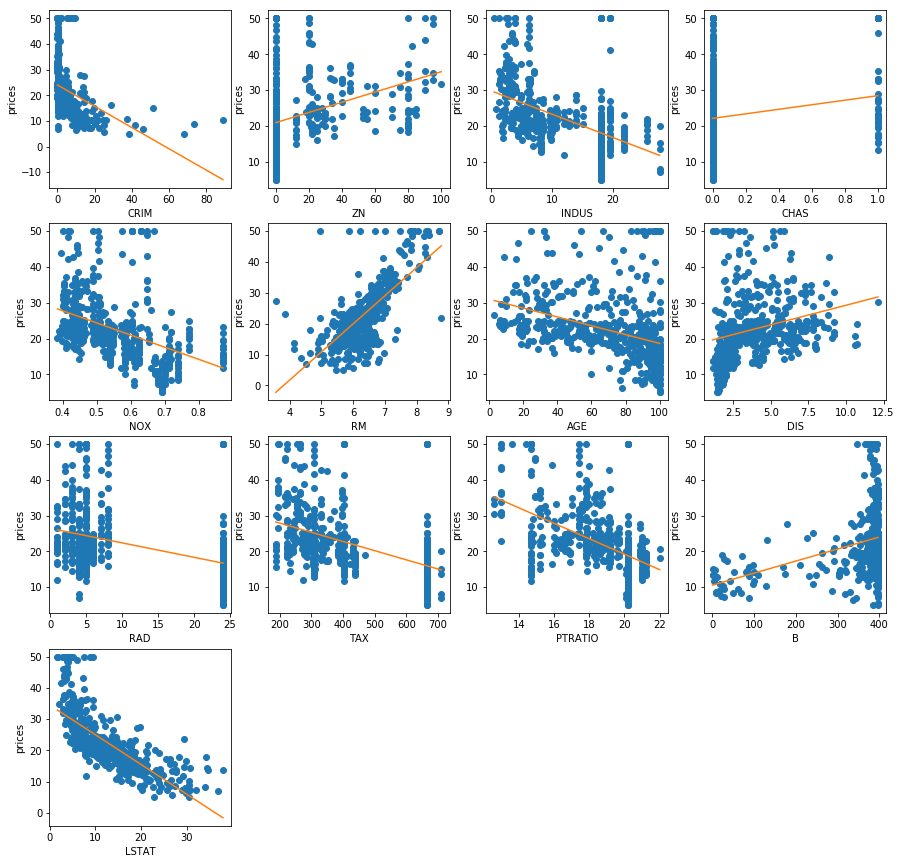

In [0]:
# Let's create some plots
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))

# This creates a graph for each column related to the actual price of the house and includes a regression line.
for index, col in enumerate(boston.columns):
    # 3 plots here hence 1, 3
    plt.subplot(4, 4, index + 1)
    x = boston[col]
    y = boston_dataset.target
    plt.plot(x, y, 'o')
    
    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.xlabel(col)
    plt.ylabel('prices')

In [0]:
from sklearn.model_selection import train_test_split

# We need to split our data into test and train data.
# Never test against data you trained on.
X_train, X_test, Y_train, Y_test = train_test_split(boston, boston_dataset.target, test_size = 0.25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


Training NRMSE is 10.673883175888344
Testing NRMSE is 9.68781067537667


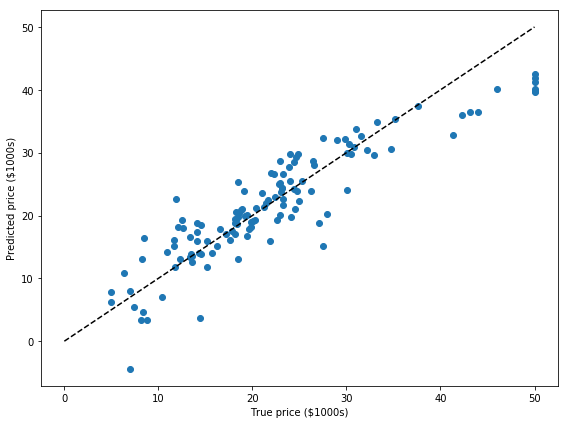

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.linear_model import LinearRegression

# Create our linear regression and fit it to our training data.
lm = LinearRegression()
lm.fit(X_train, Y_train)

# Get the max and min values of the dependent variable
max_dv = max(boston_dataset.target)
min_dv = min(boston_dataset.target)

# Training set evaluation
y_train_predict = lm.predict(X_train)

# Residual Mean Squared Error basically means that you take
# the predicted house value and subtract it from the actual house value for each observation
# and then you square that because the result could be a negative
# and then you take the mean of all of those values
# list_of_errors = (predicted - actual)^2 for all observations
# mean(list_of_errors)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

# Here we normalize the RMSE by dividing RMSE by the range of values in the dependent variable (actual housing price)
# and then multiply it by 100. This now gives us a percentage of error.
print('Training NRMSE is', 100 * rmse/(max_dv - min_dv))

# Testing set evaluation
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Testing NRMSE is', 100 * rmse/(max_dv - min_dv))

# Now we can plot the testing predictions versus the actual housing prices.
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

Training NRMSE is 2.715749918316476
Testing NRMSE is 6.7987578953484


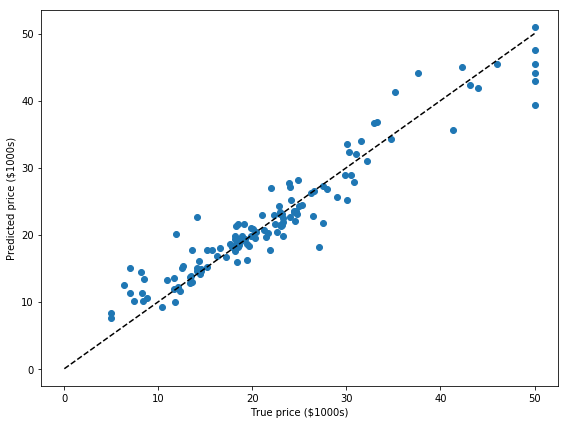

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

# Let's use a different model.
gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

# Training set evaluation
y_train_predict = gbr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('Training NRMSE is', 100 * rmse/(max_dv - min_dv))

# Testing set evaluation
y_test_predict = gbr.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Testing NRMSE is', 100 * rmse/(max_dv - min_dv))

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training NRMSE is 6.260042609717597
Testing NRMSE is 6.971780958304027


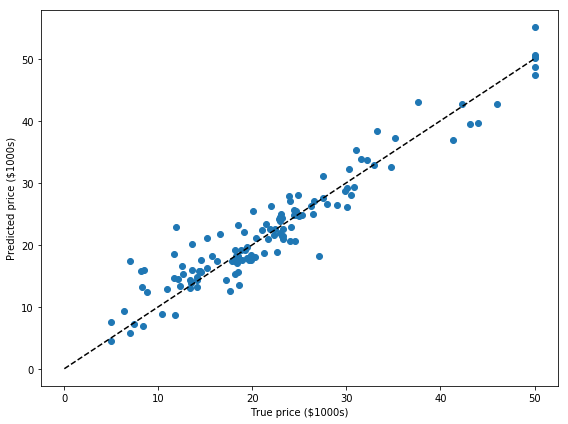

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train)  
X_train_scaled = scaler.transform(X_train)  
# apply same transformation to test data
X_test_scaled = scaler.transform(X_test)

mlpr = MLPRegressor(random_state=1, max_iter=1000)
mlpr.fit(X_train_scaled, Y_train)

# Training set evaluation
y_train_predict = mlpr.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('Training NRMSE is', 100 * rmse/(max_dv - min_dv))

# Testing set evaluation
y_test_predict = mlpr.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Testing NRMSE is', 100 * rmse/(max_dv - min_dv))

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

Training NRMSE is 2.715749918316476
Testing NRMSE is 6.83627973546216


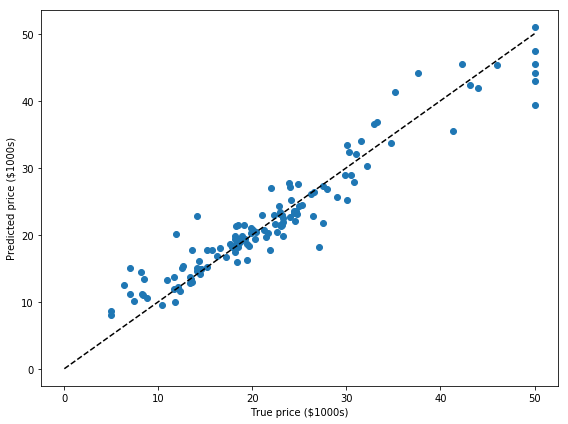

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

# Let's use a different model.
gbr = GradientBoostingRegressor()
gbr.fit(X_train_scaled, Y_train)

# Training set evaluation
y_train_predict = gbr.predict(X_train_scaled)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print('Training NRMSE is', 100 * rmse/(max_dv - min_dv))

# Testing set evaluation
y_test_predict = gbr.predict(X_test_scaled)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('Testing NRMSE is', 100 * rmse/(max_dv - min_dv))

plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()